Here, I work with MCD Nutrition Facts Data to gain a better insight.

First, import libraries and dataset.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nutrition-facts/menu.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv('../input/nutrition-facts/menu.csv')

# **Total Calories Average**

I want to know how many calories average of MCD's meal by each category

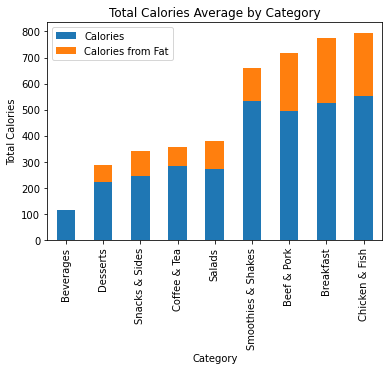

In [3]:
# How many calories does the average McDonald's value meal contain?

calories_data = dataset.iloc[:,0:5]
calories_data['Total Calories'] = calories_data['Calories']+calories_data['Calories from Fat']
calories_by_category = calories_data.groupby('Category').mean().sort_values(by='Total Calories')
calories_by_category

calories_by_category.iloc[:,:2].plot(kind='bar', stacked=True)
plt.title('Total Calories Average by Category')
plt.ylabel('Total Calories')
plt.show()

# Beverages Contribute to Overall Caloric Intake

Then, how much do each beverages contribute to overall caloric intake?

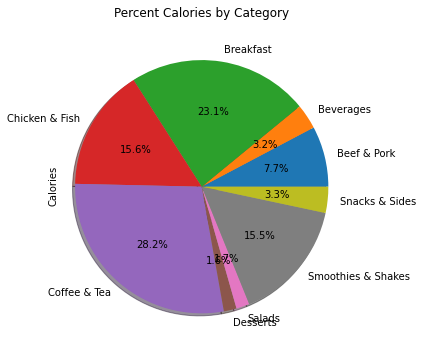

In [4]:
# How much do beverages, like soda or coffee, contribute to the overall caloric intake?
calories_by_categorysum = calories_data.groupby('Category', axis=0).sum()
calories_by_categorysum

calories_by_categorysum['Calories'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            shadow=True,       # add shadow      
                            )

plt.title('Percent Calories by Category')
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.show()

# **Grilled Chicken vs Crispy Chicken**

Based on total calories in each sandwich, i want to know which one of grilled chicken or crispy chicken give a better nutrition.

In [5]:
sandwich_data = dataset[dataset['Item'].str.contains('Sandwich')]
sandwich_data = sandwich_data.iloc[:,[1,6,8,11,13,15,17,20,21,22,23]]
sandwich_data['Total Daily Value'] = sandwich_data.sum(axis=1)
sandwich_data['Chicken Type'] = sandwich_data['Item'].str.extract("(Crispy|Grilled)")
sandwich_data['Item Type'] = sandwich_data['Item'].str.extract("(Classic|Club|Ranch|Bacon|Southern)")
sandwich_data



,Item,Total Fat (% Daily Value),Saturated Fat (% Daily Value),Cholesterol (% Daily Value),Sodium (% Daily Value),Carbohydrates (% Daily Value),Dietary Fiber (% Daily Value),Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Total Daily Value,Chicken Type,Item Type
57,Premium Crispy Chicken Classic Sandwich,33,18,16,41,18,13,4,6,15,20,184,Crispy,Classic
58,Premium Grilled Chicken Classic Sandwich,13,9,22,34,14,13,4,8,15,20,152,Grilled,Classic
59,Premium Crispy Chicken Club Sandwich,51,44,29,59,19,14,8,20,30,20,294,Crispy,Club
60,Premium Grilled Chicken Club Sandwich,31,36,35,52,15,13,8,20,30,20,260,Grilled,Club
61,Premium Crispy Chicken Ranch BLT Sandwich,43,31,24,58,19,13,4,20,15,20,247,Crispy,Ranch
62,Premium Grilled Chicken Ranch BLT Sandwich,23,22,30,51,14,13,4,20,15,20,212,Grilled,Ranch
63,Bacon Clubhouse Crispy Chicken Sandwich,59,51,31,72,22,15,8,25,30,15,328,Crispy,Bacon
64,Bacon Clubhouse Grilled Chicken Sandwich,39,42,37,65,17,15,8,30,30,15,298,Grilled,Bacon
65,Southern Style Crispy Chicken Sandwich,29,15,14,38,14,7,4,2,15,15,153,Crispy,Southern


In [6]:

sandwich_datax = dataset[dataset['Item'].str.contains('Sandwich')]
#sandwich_datax = sandwich_datax.iloc[:,[3,5,8,11,13,15,17,20,21,22,23]]
sandwich_datax = sandwich_datax.iloc[:,[1,3,5,7,10,12,14,16,18,19]]
sandwich_datax['Chicken Type'] = sandwich_datax['Item'].str.extract("(Crispy|Grilled)")
sandwich_datax

,Item,Calories,Total Fat,Saturated Fat,Cholesterol,Sodium,Carbohydrates,Dietary Fiber,Sugars,Protein,Chicken Type
57,Premium Crispy Chicken Classic Sandwich,510,22.0,3.5,45,990,55,3,10,24,Crispy
58,Premium Grilled Chicken Classic Sandwich,350,9.0,2.0,65,820,42,3,8,28,Grilled
59,Premium Crispy Chicken Club Sandwich,670,33.0,9.0,85,1410,58,3,11,36,Crispy
60,Premium Grilled Chicken Club Sandwich,510,20.0,7.0,105,1250,44,3,9,40,Grilled
61,Premium Crispy Chicken Ranch BLT Sandwich,610,28.0,6.0,70,1400,57,3,11,32,Crispy
62,Premium Grilled Chicken Ranch BLT Sandwich,450,15.0,4.5,90,1230,43,3,9,36,Grilled
63,Bacon Clubhouse Crispy Chicken Sandwich,750,38.0,10.0,90,1720,65,4,16,36,Crispy
64,Bacon Clubhouse Grilled Chicken Sandwich,590,25.0,8.0,110,1560,51,4,14,40,Grilled
65,Southern Style Crispy Chicken Sandwich,430,19.0,3.0,45,910,43,2,7,21,Crispy


In [7]:
sandwich_datax['Total Calories'] = sandwich_datax['Calories']+sandwich_datax['Total Fat']+sandwich_datax['Saturated Fat']+sandwich_datax['Sodium']+sandwich_datax['Carbohydrates']+sandwich_datax['Dietary Fiber']+sandwich_datax['Sugars']+sandwich_datax['Protein']+sandwich_datax['Cholesterol']

nutrition_by_item = sandwich_datax.groupby('Item').mean().sort_values(by='Item')
nutrition_by_item


,Calories,Total Fat,Saturated Fat,Cholesterol,Sodium,Carbohydrates,Dietary Fiber,Sugars,Protein,Total Calories
Item,,,,,,,,,,
Bacon Clubhouse Crispy Chicken Sandwich,750,38.0,10.0,90,1720,65,4,16,36,2729.0
Bacon Clubhouse Grilled Chicken Sandwich,590,25.0,8.0,110,1560,51,4,14,40,2402.0
Premium Crispy Chicken Classic Sandwich,510,22.0,3.5,45,990,55,3,10,24,1662.5
Premium Crispy Chicken Club Sandwich,670,33.0,9.0,85,1410,58,3,11,36,2315.0
Premium Crispy Chicken Ranch BLT Sandwich,610,28.0,6.0,70,1400,57,3,11,32,2217.0
Premium Grilled Chicken Classic Sandwich,350,9.0,2.0,65,820,42,3,8,28,1327.0
Premium Grilled Chicken Club Sandwich,510,20.0,7.0,105,1250,44,3,9,40,1988.0
Premium Grilled Chicken Ranch BLT Sandwich,450,15.0,4.5,90,1230,43,3,9,36,1880.5
Southern Style Crispy Chicken Sandwich,430,19.0,3.0,45,910,43,2,7,21,1480.0


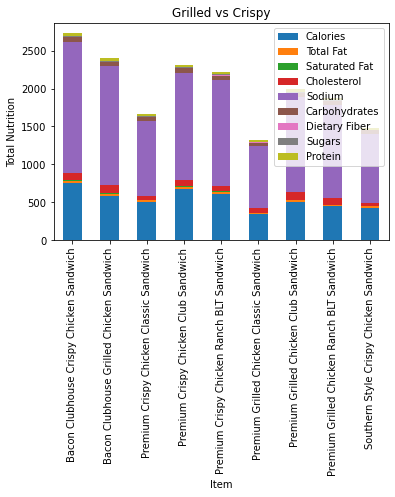

<Figure size 720x504 with 0 Axes>

In [8]:
nutrition_by_item.iloc[:,[0,1,2,3,4,5,6,7,8]].plot(kind='bar', stacked=True)
#nutrition_by_item.iloc[:,[2,3,4,5,6,7,8,9,10,11,12,13]].plot(kind='bar', stacked=True)
plt.title('Grilled vs Crispy')
plt.ylabel('Total Nutrition')
plt.figure(figsize=(10,7))
plt.show()

In [9]:
nutrition_by_type = sandwich_datax.groupby('Chicken Type').mean().sort_values(by='Chicken Type')
nutrition_by_type


,Calories,Total Fat,Saturated Fat,Cholesterol,Sodium,Carbohydrates,Dietary Fiber,Sugars,Protein,Total Calories
Chicken Type,,,,,,,,,,
Crispy,594.0,28.00,6.300,67.0,1286.0,55.6,3.00,11.0,29.8,2080.700
Grilled,475.0,17.25,5.375,92.5,1215.0,45.0,3.25,10.0,36.0,1899.375


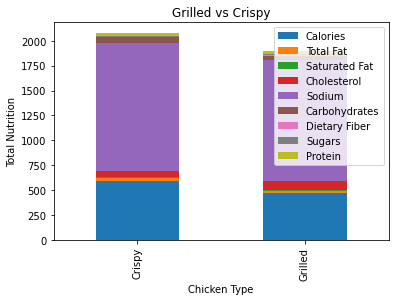

<Figure size 720x504 with 0 Axes>

In [10]:
# Does ordered grilled chicken instead of crispy increase a sandwich's nutritional value?

nutrition_by_type.iloc[:,[0,1,2,3,4,5,6,7,8]].plot(kind='bar', stacked=True)
#nutrition_by_item.iloc[:,[2,3,4,5,6,7,8,9,10,11,12,13]].plot(kind='bar', stacked=True)
plt.title('Grilled vs Crispy')
plt.ylabel('Total Nutrition')
plt.figure(figsize=(10,7))
plt.show()

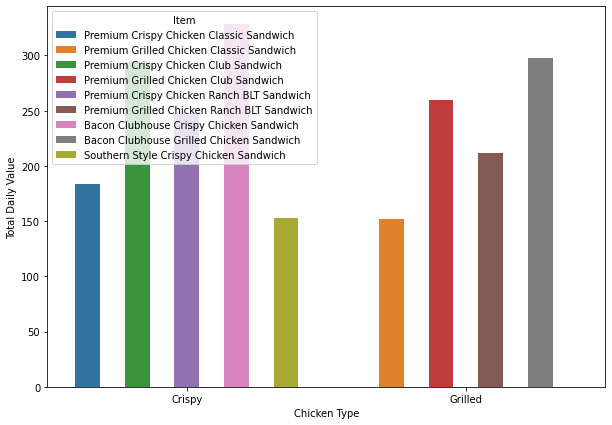

In [11]:
plt.figure(figsize=(10,7))
sns.barplot(sandwich_data['Chicken Type'], sandwich_data['Total Daily Value'], hue=sandwich_data['Item'])
plt.show()

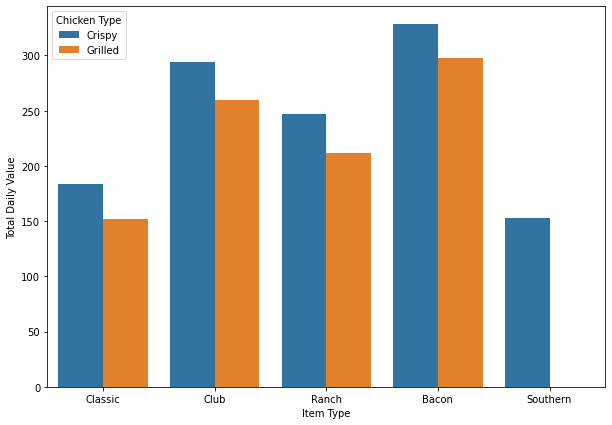

In [12]:
plt.figure(figsize=(10,7))
sns.barplot(sandwich_data['Item Type'], sandwich_data['Total Daily Value'], hue=sandwich_data['Chicken Type'])
plt.show()

# **Whole eggs vs Egg Whites**

Based on total calories in each sandwich, i want to know which one of grilled chicken or crispy chicken give a better nutrition.

In [13]:
egg_data = dataset[dataset['Item'].str.contains('Egg')]
#sandwich_datax = sandwich_datax.iloc[:,[3,5,8,11,13,15,17,20,21,22,23]]
egg_data = egg_data.iloc[:,[1,3,5,7,10,12,14,16,18,19]]
egg_data['Egg Type'] = egg_data['Item'].str.extract("(Egg Whites|Egg)")
egg_data['Egg Type'] = egg_data['Egg Type'].map({'Egg Whites': "Egg Whites", 'Egg': "Whole Eggs"})

egg_data

,Item,Calories,Total Fat,Saturated Fat,Cholesterol,Sodium,Carbohydrates,Dietary Fiber,Sugars,Protein,Egg Type
0,Egg McMuffin,300,13.0,5.0,260,750,31,4,3,17,Whole Eggs
1,Egg White Delight,250,8.0,3.0,25,770,30,4,3,18,Whole Eggs
3,Sausage McMuffin with Egg,450,28.0,10.0,285,860,30,4,2,21,Whole Eggs
4,Sausage McMuffin with Egg Whites,400,23.0,8.0,50,880,30,4,2,21,Egg Whites
5,Steak & Egg McMuffin,430,23.0,9.0,300,960,31,4,3,26,Whole Eggs
6,"Bacon, Egg & Cheese Biscuit (Regular Biscuit)",460,26.0,13.0,250,1300,38,2,3,19,Whole Eggs
7,"Bacon, Egg & Cheese Biscuit (Large Biscuit)",520,30.0,14.0,250,1410,43,3,4,19,Whole Eggs
8,"Bacon, Egg & Cheese Biscuit with Egg Whites (R...",410,20.0,11.0,35,1300,36,2,3,20,Whole Eggs
9,"Bacon, Egg & Cheese Biscuit with Egg Whites (L...",470,25.0,12.0,35,1420,42,3,4,20,Whole Eggs
12,Sausage Biscuit with Egg (Regular Biscuit),510,33.0,14.0,250,1170,36,2,2,18,Whole Eggs


In [14]:
nutrition_by_type_egg = egg_data.groupby('Egg Type').mean().sort_values(by='Egg Type')
nutrition_by_type_egg

,Calories,Total Fat,Saturated Fat,Cholesterol,Sodium,Carbohydrates,Dietary Fiber,Sugars,Protein
Egg Type,,,,,,,,,
Egg Whites,678.571429,36.571429,13.285714,42.857143,1585.714286,62.000000,4.142857,7.142857,25.571429
Whole Eggs,482.222222,25.500000,10.722222,191.666667,1238.888889,41.888889,2.777778,6.444444,21.888889


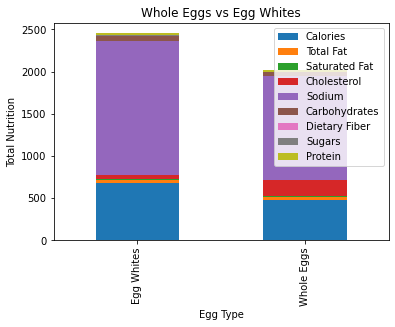

<Figure size 720x504 with 0 Axes>

In [15]:
# What about ordering egg whites instead of whole eggs?

nutrition_by_type_egg.iloc[:,[0,1,2,3,4,5,6,7,8]].plot(kind='bar', stacked=True)
#nutrition_by_item.iloc[:,[2,3,4,5,6,7,8,9,10,11,12,13]].plot(kind='bar', stacked=True)
plt.title('Whole Eggs vs Egg Whites')
plt.ylabel('Total Nutrition')
plt.figure(figsize=(10,7))
plt.rcParams["figure.figsize"] = [10,7]
plt.show()